# Unsupervised Learning On Country Data

Bu çalışma, ülkenin genel gelişimini belirleyen sosyo-ekonomik ve sağlık faktörlerini kullanarak ülkeleri kategorize etmeyi amaçlamaktadır.

<img src="countries.webp" width="100%"></img>

### About Data

### Libraries

In [66]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Country-data.csv",encoding = 'ISO-8859-1')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
print(df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [5]:
df.duplicated().sum() 

0

In [9]:
abs(df.corr()['gdpp'].sort_values(ascending=False))

gdpp          1.000000
income        0.895571
life_expec    0.600089
exports       0.418725
health        0.345966
imports       0.115498
inflation     0.221631
total_fer     0.454910
child_mort    0.483032
Name: gdpp, dtype: float64

In [68]:
data=dict(
    type="choropleth",
    colorscale="Viridis",
    reversescale=True,
    locations=df["country"],
    locationmode="country names",
    z=df["gdpp"], #üzerine gelecek veri,
    text=df["country"], #mouse overda çıkacak text,
    colorbar={'title':"WORLD GDPP"}
    )
layout=dict(title="WORLD GDPP",
           geo=dict(showframe=False,projection={'type':'mercator'})
           )

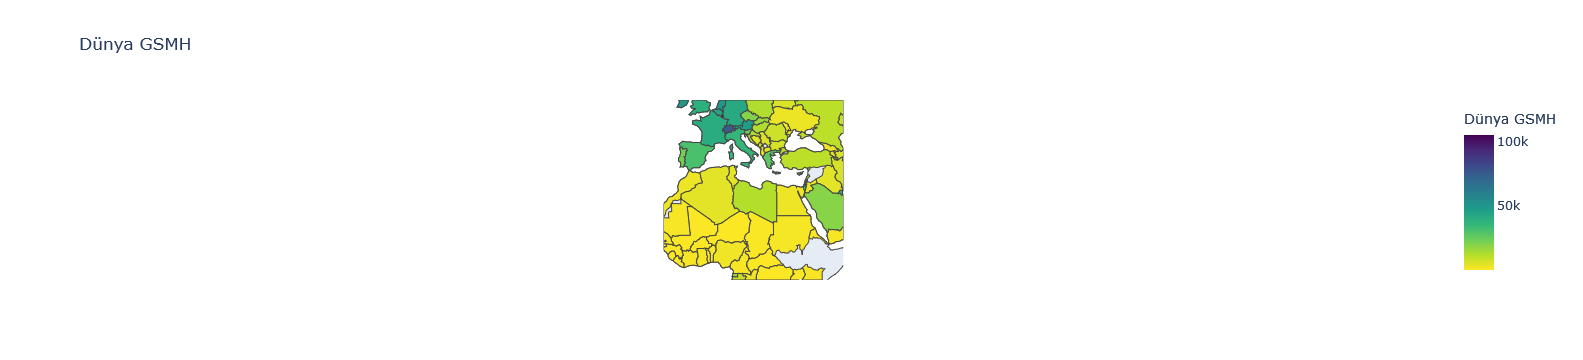

In [55]:
choromap=go.Figure(data=data,layout=layout)
iplot(choromap,validate=False) #firefox developer edition açılmıyor

### Clustering

In [53]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Cluster'],
      dtype='object')

In [21]:
x=df.drop('country',axis=1)

In [22]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("cluster ",i," score",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
        
clust(11)

cluster  2  score 0.7256314906273207
cluster  3  score 0.7106457354531156
cluster  4  score 0.6109297437247547
cluster  5  score 0.572715818235237
cluster  6  score 0.5923323846898451
cluster  7  score 0.5959257331107111
cluster  8  score 0.5964827694227414
cluster  9  score 0.5523907569989968
cluster  10  score 0.5564674502437785
cluster  11  score 0.5466524256210938


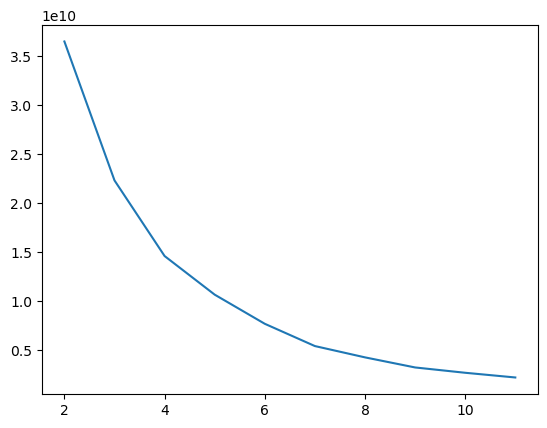

In [24]:
plt.plot(allclusters,uzakliklar)

In [56]:
model=KMeans(n_clusters=3) 

In [57]:
model=model.fit(x)

In [58]:
pred=model.predict(x)

In [59]:
pred

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [60]:
x["Cluster"]=pred

In [61]:
x.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
138,4.1,49.4,6.93,46.2,30400,3.16,80.1,1.23,22100,2
34,15.7,26.3,5.07,22.6,9530,6.94,74.6,1.59,4560,0
28,108.0,22.2,5.13,27.0,2660,1.91,57.3,5.11,1310,0
100,15.0,51.2,6.00,62.2,15900,1.13,73.4,1.57,8000,0
101,40.0,23.5,14.20,81.0,3340,3.80,65.4,3.46,2860,0
149,62.6,2.2,9.12,27.8,1850,26.50,71.1,6.23,3600,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
154,62.0,76.3,2.50,44.5,9940,2.31,67.9,2.83,4440,0
36,88.2,16.5,4.51,51.7,1410,3.87,65.9,4.75,769,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0


In [62]:
silhouette_score(x,pred)

0.7003508059229675

In [63]:
df['Cluster']=x['Cluster']

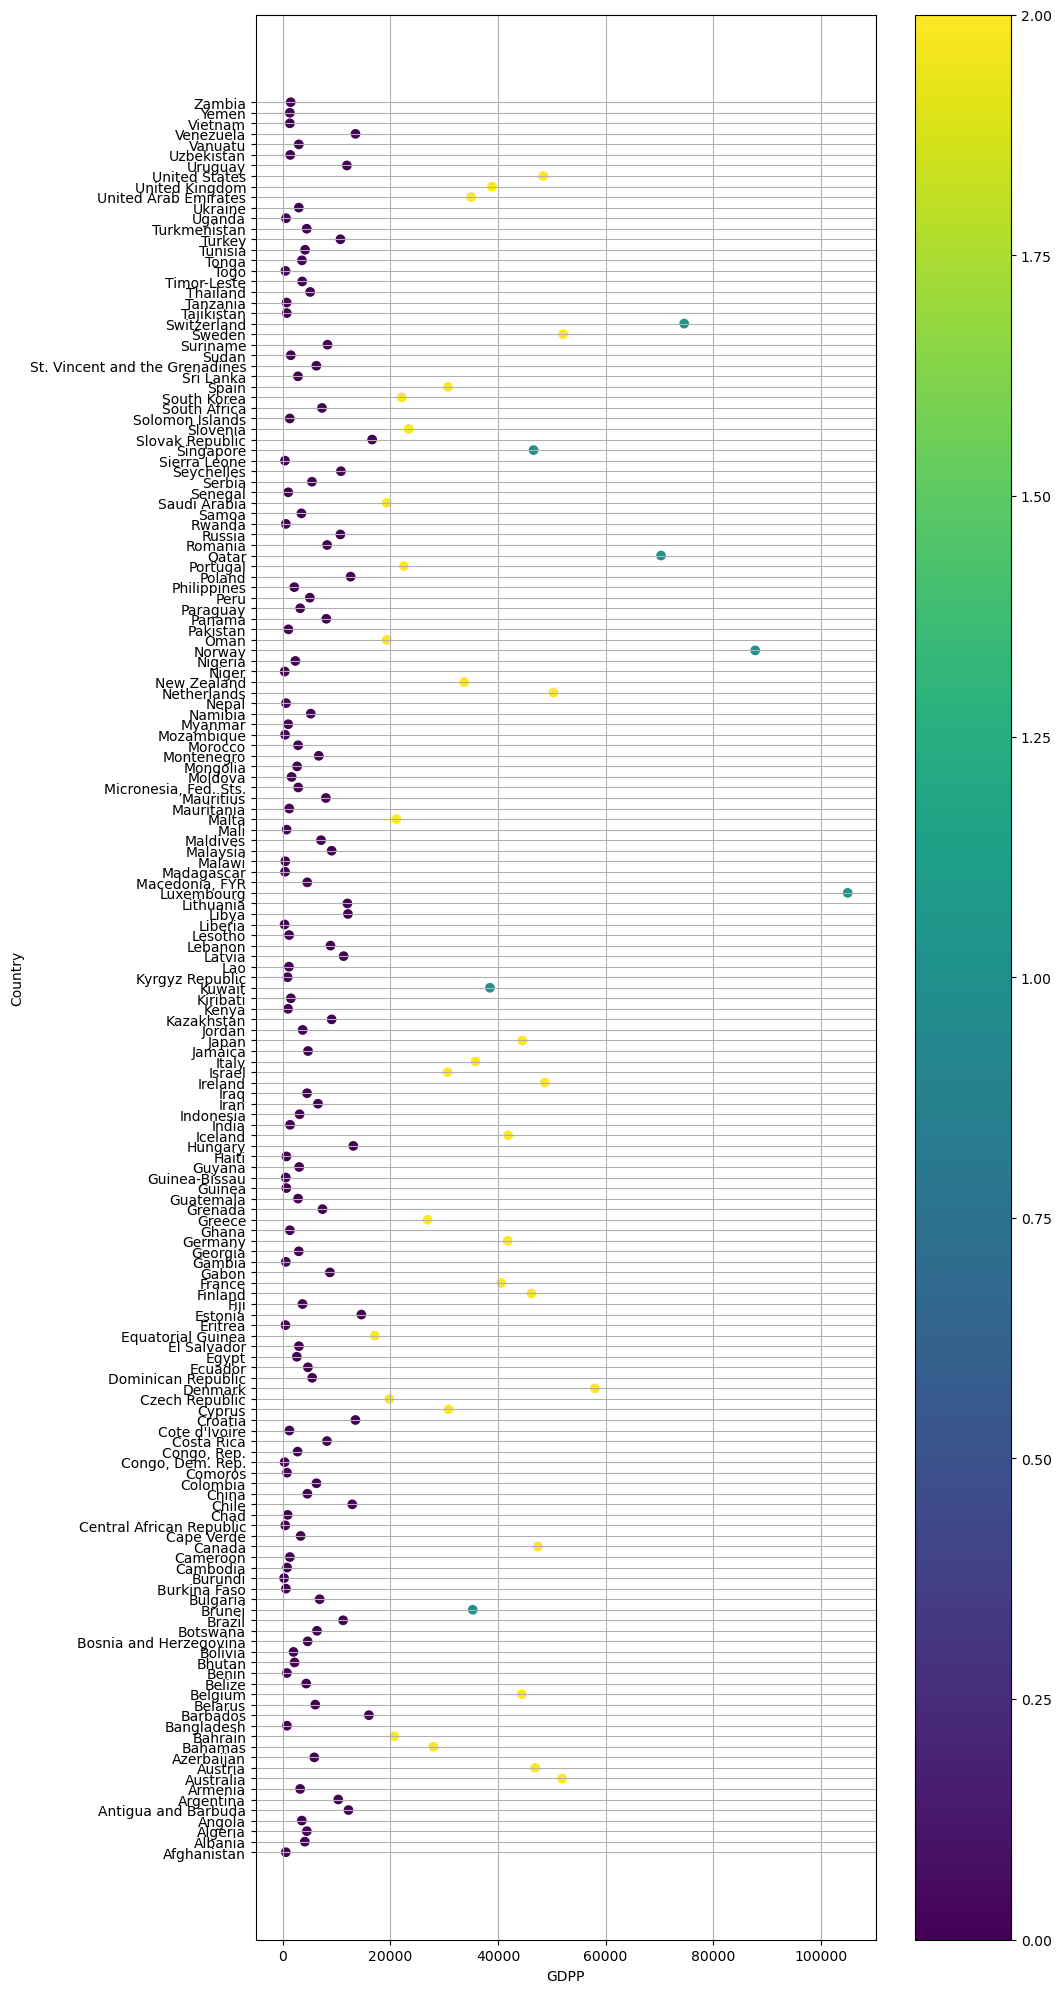

In [69]:
plt.figure(figsize=(10,25))
plt.scatter(x.gdpp,df["country"],c=pred)
plt.xlabel("GDPP")
plt.ylabel("Country")
plt.colorbar()
plt.grid()

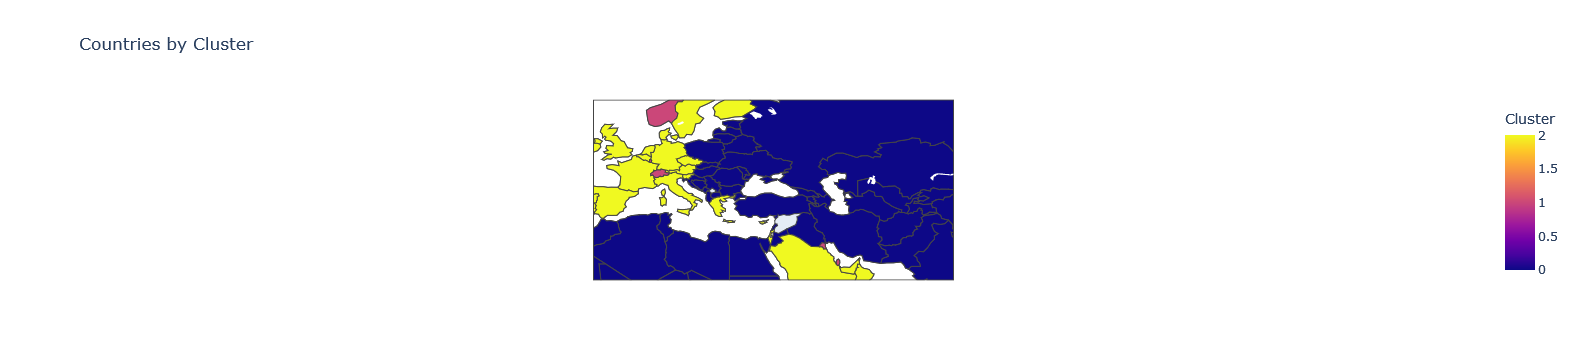

In [70]:
px.choropleth(data_frame=df,
              locationmode='country names',
              locations='country',
              color=df['Cluster'], 
              title='Countries by Cluster',
              color_discrete_map={'0':'#DB1C18','1':'#DBDB3B','2':'#51A2DB'},
              projection='equirectangular')

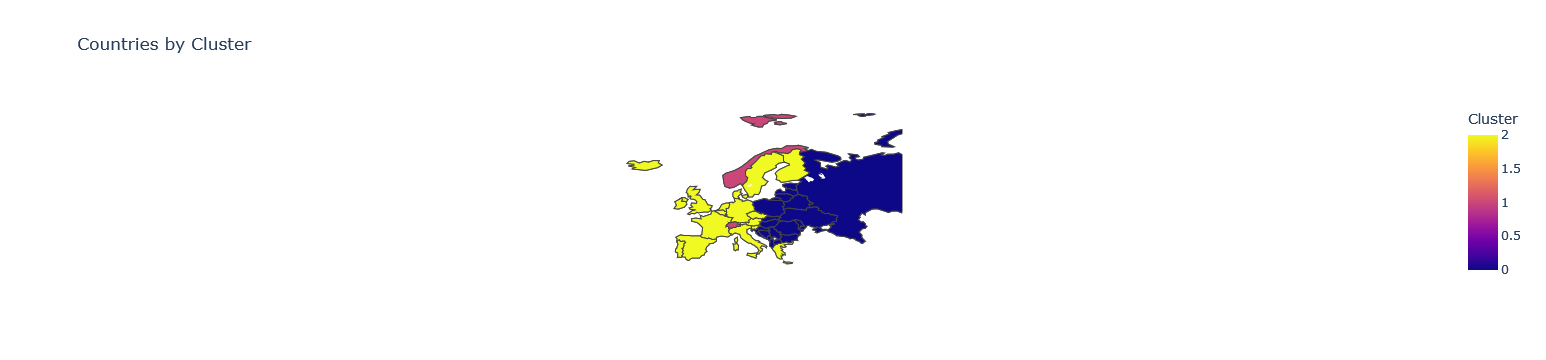

In [72]:
px.choropleth(data_frame=df,
              locationmode='country names',
              locations='country',
              color=df['Cluster'], 
              title='Countries by Cluster',
              color_discrete_map={'0':'#DB1C18','1':'#DBDB3B','2':'#51A2DB'},
              projection='equirectangular',
             scope='europe') # scope belirterek bölge olarak gösterimi sağlanabiliyor.

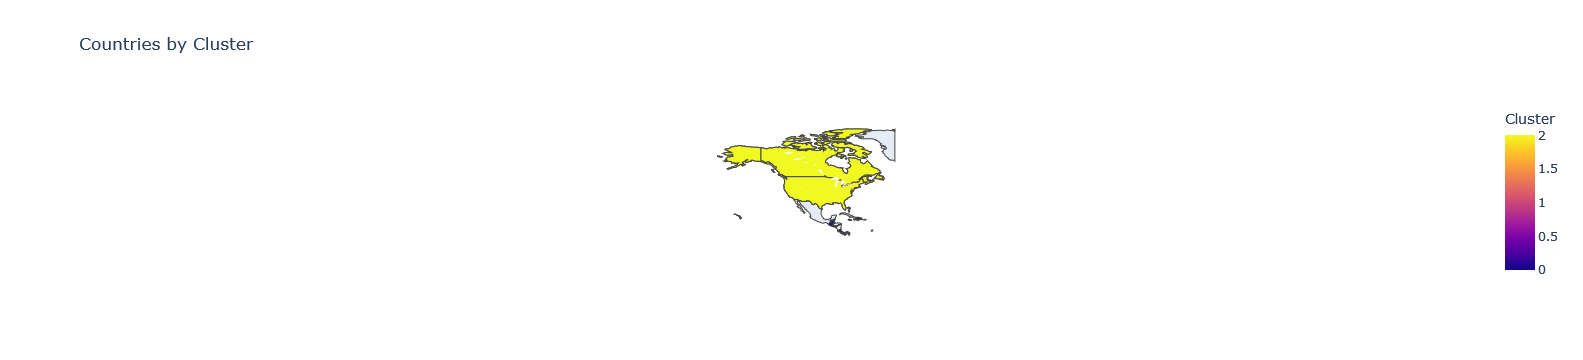

In [75]:
px.choropleth(data_frame=df,
              locationmode='country names',
              locations='country',
              color=df['Cluster'], 
              title='Countries by Cluster',
              color_discrete_map={'0':'#DB1C18','1':'#DBDB3B','2':'#51A2DB'},
              projection='equirectangular',
             scope='north america') # scope belirterek bölge olarak gösterimi sağlanabiliyor.